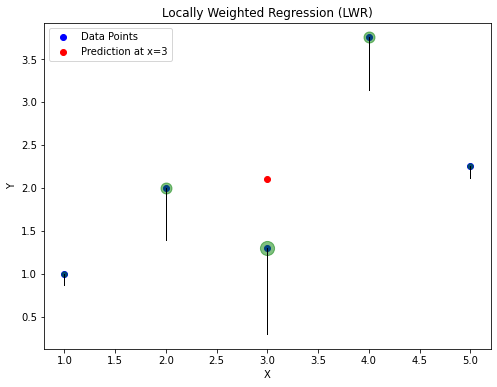

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_kernel(x, x_query, tau):
    return np.exp(- (x - x_query) ** 2 / (2 * tau ** 2))

def locally_weighted_regression(X, y, x_query, tau):
    X_b = np.c_[np.ones(len(X)), X]  # Add bias term (Intercept)
    x_query_b = np.array([1, x_query])  # Query point with bias term
    
    W = np.diag(gaussian_kernel(X, x_query, tau))  # Compute weights
    
    # Compute theta: (X^T W X)^-1 X^T W y
    theta = np.linalg.inv(X_b.T @ W @ X_b) @ X_b.T @ W @ y
    
    return x_query_b @ theta  # Return prediction

# Dataset
X = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 1.3, 3.75, 2.25])

# Query point
x_query = 3  # Point at which we perform LWR

# Bandwidth parameter
tau = 1.0

# Compute prediction
y_pred = locally_weighted_regression(X, y, x_query, tau)

# Visualizing
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.scatter(x_query, y_pred, color='red', label=f'Prediction at x={x_query}')

# Plot weights effect
weights = gaussian_kernel(X, x_query, tau)
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], y[i] - weights[i]], 'k-', lw=1)
    plt.scatter(X[i], y[i], s=weights[i] * 200, color='green', alpha=0.5)

plt.title("Locally Weighted Regression (LWR)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


Explanation of the Code

    gaussian_kernel(x, x_query, tau): Computes weights using the Gaussian kernel.
    locally_weighted_regression(X, y, x_query, tau):
        Computes the weight matrix WW.
        Solves for θ using weighted least squares.
        Predicts yy for the query point xqxq​.
    Visualization:
        Data points (blue dots).
        Prediction at xq=3xq​=3 (red dot).
        Weight influence is shown using vertical lines and green bubbles.

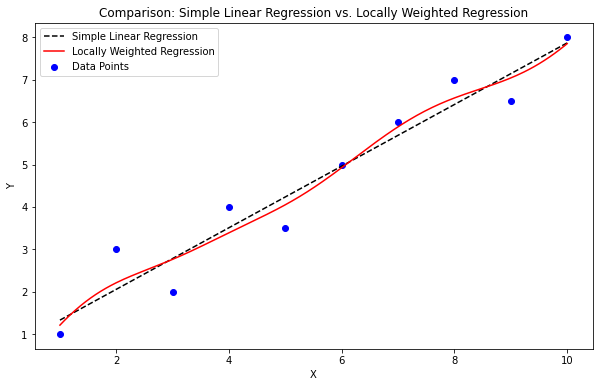

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def gaussian_kernel(x, x_query, tau):
    return np.exp(- (x - x_query) ** 2 / (2 * tau ** 2))

def locally_weighted_regression(X, y, x_query, tau):
    X_b = np.c_[np.ones(len(X)), X]  # Add bias term (Intercept)
    
    
    x_query_b = np.array([1, x_query])  # Query point with bias term
    #print(x_query_b)
    W = np.diag(gaussian_kernel(X, x_query, tau))  # Compute weights
    
    # Compute theta: (X^T W X)^-1 X^T W y
    theta = np.linalg.inv(X_b.T @ W @ X_b) @ X_b.T @ W @ y
    
    return x_query_b @ theta  # Return prediction

# Complex Dataset
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 3, 2, 4, 3.5, 5, 6, 7, 6.5, 8])

# Query points for LWR
X_query = np.linspace(1, 10, 200)

tau = 1.0  # Bandwidth parameter

# Compute LWR predictions
y_lwr = np.array([locally_weighted_regression(X, y, x_q, tau) for x_q in X_query])

# Simple Linear Regression
lin_reg = LinearRegression()
X_reshaped = X.reshape(-1, 1)
lin_reg.fit(X_reshaped, y)
y_lin = lin_reg.predict(X_query.reshape(-1, 1))

# Visualizing
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_query, y_lin, color='black', linestyle='dashed', label='Simple Linear Regression')
plt.plot(X_query, y_lwr, color='red', label='Locally Weighted Regression')
plt.title("Comparison: Simple Linear Regression vs. Locally Weighted Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


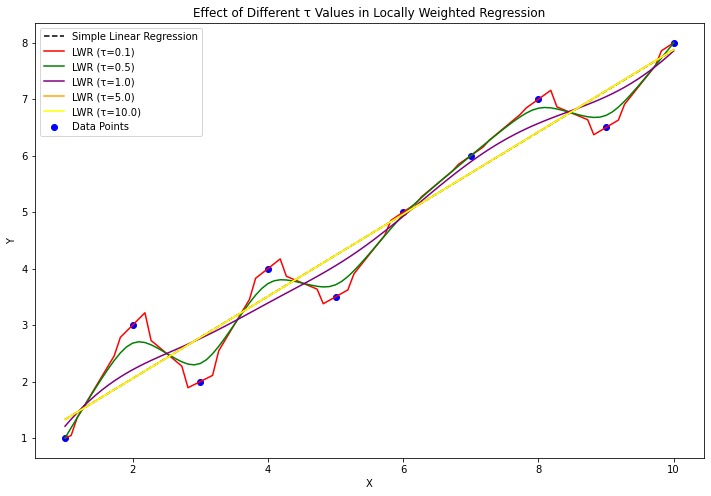

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def gaussian_kernel(x, x_query, tau):
    return np.exp(- (x - x_query) ** 2 / (2 * tau ** 2))

def locally_weighted_regression(X, y, x_query, tau):
    X_b = np.c_[np.ones(len(X)), X]  # Add bias term (Intercept)
    x_query_b = np.array([1, x_query])  # Query point with bias term
    
    W = np.diag(gaussian_kernel(X, x_query, tau))  # Compute weights
    
    # Compute theta using pseudo-inverse to avoid singular matrix error
    theta = np.linalg.pinv(X_b.T @ W @ X_b) @ X_b.T @ W @ y
    
    return x_query_b @ theta  # Return prediction

# Complex Dataset
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 3, 2, 4, 3.5, 5, 6, 7, 6.5, 8])

# Query points for LWR
X_query = np.linspace(1, 10, 100)

tau_values = [0.1, 0.5, 1.0, 5.0, 10.0]  # Different bandwidth values

# Simple Linear Regression
lin_reg = LinearRegression()
X_reshaped = X.reshape(-1, 1)
lin_reg.fit(X_reshaped, y)
y_lin = lin_reg.predict(X_query.reshape(-1, 1))

# Visualizing
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_query, y_lin, color='black', linestyle='dashed', label='Simple Linear Regression')

# Plot LWR for different tau values
colors = ['red', 'green', 'purple', 'orange', 'yellow']
for tau, color in zip(tau_values, colors):
    y_lwr = np.array([locally_weighted_regression(X, y, x_q, tau) for x_q in X_query])
    plt.plot(X_query, y_lwr, color=color, label=f'LWR (τ={tau})')

plt.title("Effect of Different τ Values in Locally Weighted Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


The tau (τ) parameter in your code is the bandwidth for the Gaussian kernel, which controls how much influence nearby points have in the Locally Weighted Regression (LWR). Here's what it does:

    Determines the Weight Decay:
        If τ is small, only very nearby points contribute significantly, making LWR behave like a very local model (more sensitive to noise).
        If τ is large, more distant points contribute significantly, making LWR behave more like global linear regression.

    Controls the Model Complexity:
        A small τ → Highly flexible model, more prone to overfitting.
        A large τ → More smoothing, leading to a simpler model (can underfit if too large).

Example Effect of Tau

    τ = 0.1 → LWR behaves almost like a nearest-neighbor model (highly local, very wiggly curve).
    τ = 1.0 → Moderate smoothing, a good balance between flexibility and generalization.
    τ = 10 → LWR behaves like ordinary least squares regression (all points are weighted almost equally).